# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q={}&appid={}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Limit amount of cities to process
max_cities = len(cities)

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    if i > max_cities:
        break # hard stop after processing maximum cities

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(city, weather_api_key)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    #time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | makokou
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | toliara
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | port augusta
Processing Record 9 of Set 1 | kristiansund
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | reggane
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | gargalianoi
Processing Record 17 of Set 1 | selfoss
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | melfort
Processing Record 20 of Set 1 | vernon
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,8.16,73,22,1.78,ZA,1722357760
1,makokou,0.5738,12.8642,24.42,68,83,1.10,GA,1722357761
2,codrington,-38.2667,141.9667,5.39,92,7,3.40,AU,1722357761
3,port elizabeth,-33.9180,25.5701,13.16,65,0,7.72,ZA,1722357761
4,toliara,-23.3500,43.6667,20.93,74,0,6.23,MG,1722357761


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [58]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,8.16,73,22,1.78,ZA,1722357760
1,makokou,0.5738,12.8642,24.42,68,83,1.10,GA,1722357761
2,codrington,-38.2667,141.9667,5.39,92,7,3.40,AU,1722357761
3,port elizabeth,-33.9180,25.5701,13.16,65,0,7.72,ZA,1722357761
4,toliara,-23.3500,43.6667,20.93,74,0,6.23,MG,1722357761


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

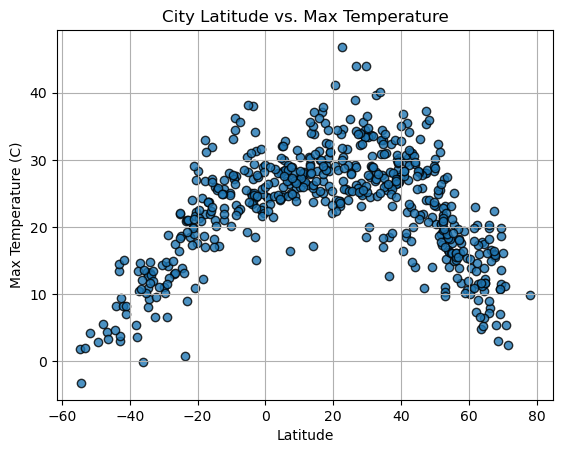

In [59]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

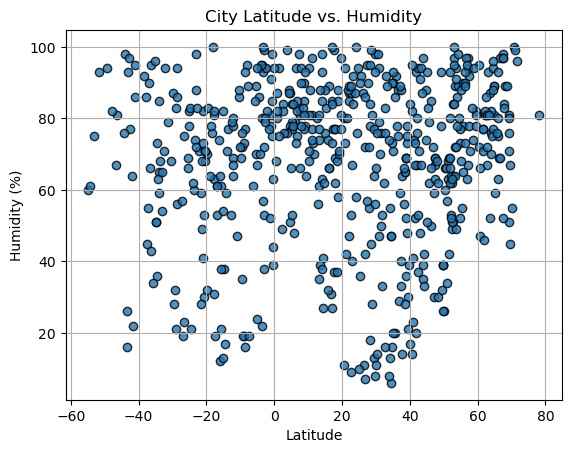

In [60]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

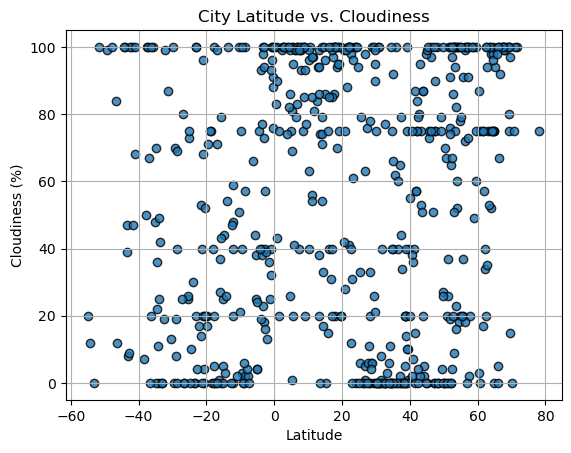

In [61]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

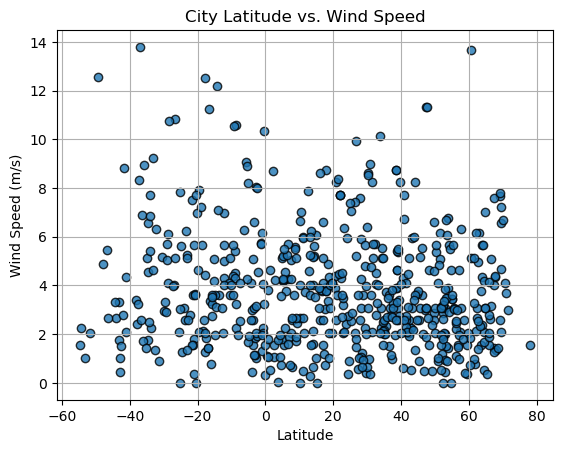

In [62]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

    print(f"The r-squared value is: {rvalue**2}")

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,makokou,0.5738,12.8642,24.42,68,83,1.10,GA,1722357761
8,kristiansund,63.1115,7.7320,16.03,93,75,6.17,NO,1722357761
11,reggane,26.7158,0.1714,43.94,7,1,9.91,DZ,1722357762
12,saipan,15.1355,145.7010,28.39,83,0,0.00,MP,1722357762
14,gargalianoi,37.0667,21.6333,32.42,59,2,2.78,GR,1722357762


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,8.16,73,22,1.78,ZA,1722357760
2,codrington,-38.2667,141.9667,5.39,92,7,3.40,AU,1722357761
3,port elizabeth,-33.9180,25.5701,13.16,65,0,7.72,ZA,1722357761
4,toliara,-23.3500,43.6667,20.93,74,0,6.23,MG,1722357761
5,blackmans bay,-43.0167,147.3167,3.07,93,8,0.45,AU,1722357761


###  Temperature vs. Latitude Linear Regression Plot

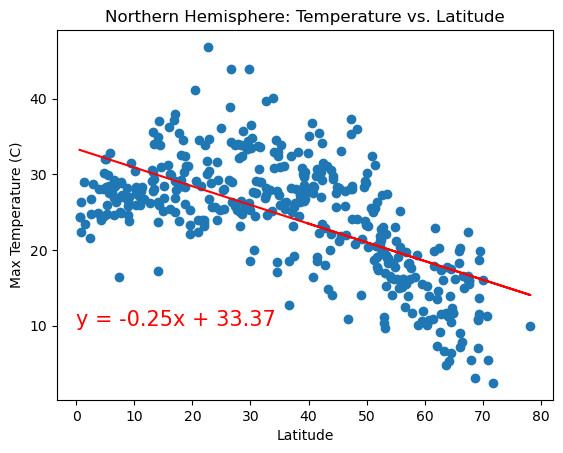

The r-squared value is: 0.40136232270847


In [83]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere: Temperature vs. Latitude", 
                       "Max Temperature (C)", (0, 10))



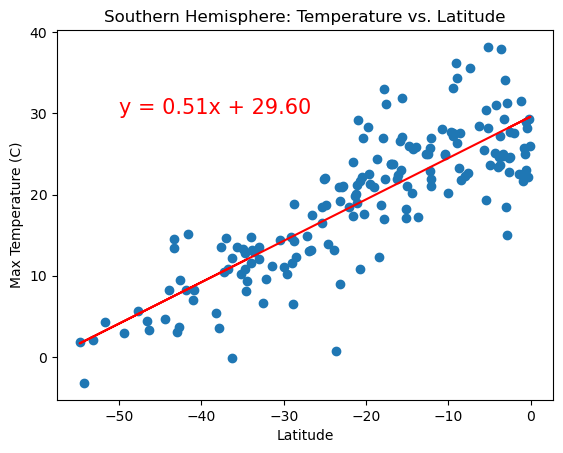

The r-squared value is: 0.6984896527608656


In [67]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere: Temperature vs. Latitude", 
                       "Max Temperature (C)", (-50, 30))


**Discussion about the linear relationship:** The linear regression analysis shows a negative correlation between temperature and latitude in both hemispheres: temperatures generally decrease as latitude increases. This relationship is depicted by the negative slope of the regression line in both hemispheres, indicating that temperatures drop as you move further from the equator.

### Humidity vs. Latitude Linear Regression Plot

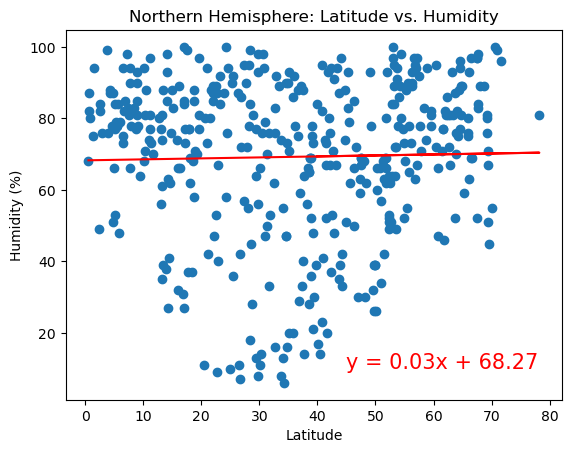

The r-squared value is: 0.000582502335438236


In [68]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Latitude vs. Humidity", 
                       "Humidity (%)", (45, 10))


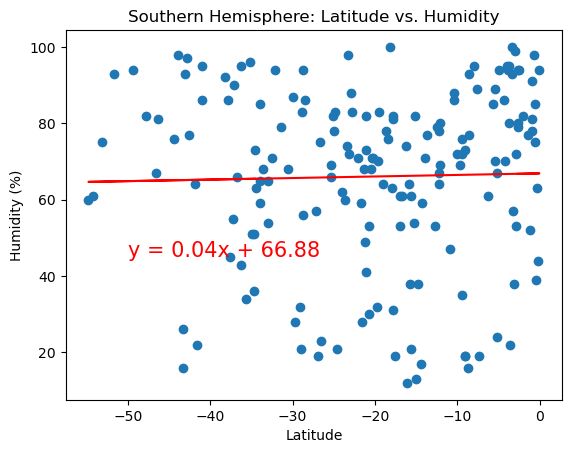

The r-squared value is: 0.0005955293366066281


In [84]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere: Latitude vs. Humidity", 
                       "Humidity (%)", (-50, 45))


**Discussion about the linear relationship:** The linear regression analysis shows a weak correlation between humidity and latitude in both hemispheres, with low r-squared values indicating that latitude does not significantly affect humidity. The scatter plots shows a random distribution of humidity values, suggesting that something else, other than latitude, have a greater influence on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

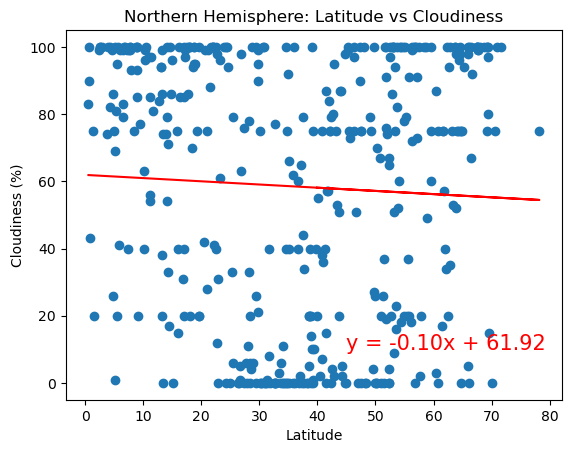

The r-squared value is: 0.0023212259204499516


In [70]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere: Latitude vs Cloudiness", 
                       "Cloudiness (%)", (45, 10))


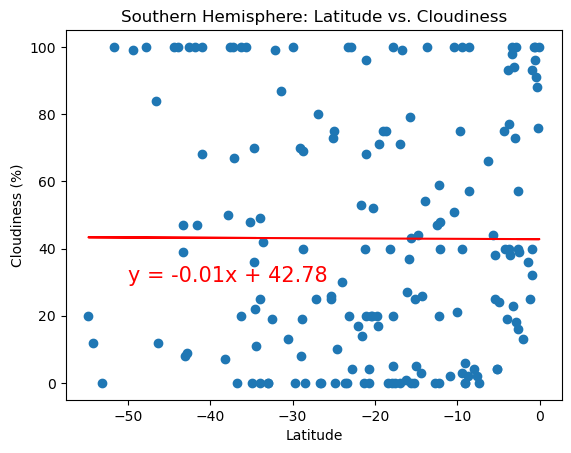

The r-squared value is: 1.5365934782834715e-05


In [71]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere: Latitude vs. Cloudiness", 
                       "Cloudiness (%)", (-50, 30))


**Discussion about the linear relationship:** The linear regression analysis shows a weak correlation between cloudiness and latitude in both hemispheres. Scatter plots indicate no clear trend, and the regression lines have small slopes with low r-squared values. This suggests that cloudiness does not significantly change with latitude and is likely influenced by something else.

### Wind Speed vs. Latitude Linear Regression Plot

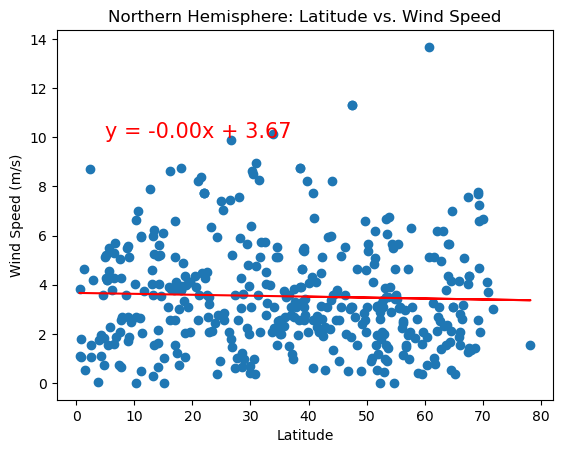

The r-squared value is: 0.0011765477603041064


In [72]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere: Latitude vs. Wind Speed", 
                       "Wind Speed (m/s)", (5, 10))


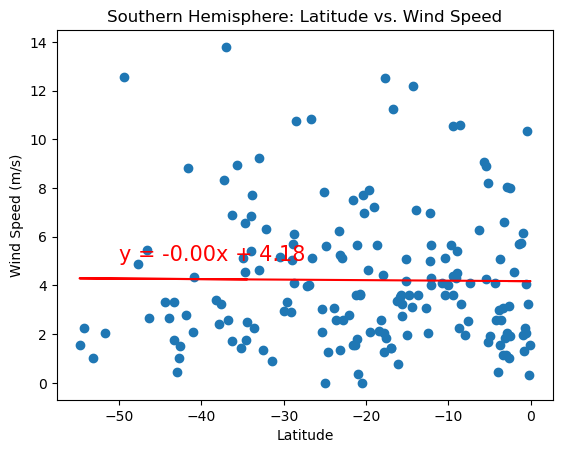

The r-squared value is: 0.0001123234315188468


In [73]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere: Latitude vs. Wind Speed", 
                       "Wind Speed (m/s)", (-50, 5))


**Discussion about the linear relationship:**  The linear regression analysis shows a very weak correlation between wind speed and latitude in both hemispheres, with extremely low r-squared values. This indicates that wind speed is not significantly affected by latitude.